<a href="https://colab.research.google.com/github/cacordobae/An-lisis-de-ventas/blob/main/Analisis_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display, HTML
import plotly.express as px

cf.set_config_file(sharing='public', theme= 'ggplot',offline=True)



# Análisis exploratorio de la base de datos 'ventas'.

Se dispone de información sobre una operación de televentas que busca promover la generación de pedidos para negocios de venta directa. En la actualidad, la marca ha incorporado un nuevo grupo de representantes dee ventas que aún no han realizado su primer pedido. El objetivo es diseñar estrategias de acompañamiento para impulsar el éxito del negocio en este contexto.
Se desea describir a profundidad el comportamiento detallado de la base de datos.
Base de ventas: Comprende información sobre clientes que ya han sido gestionado
en otros ciclos campañales.
Las variables en la base de datos son:

 Numero de documento: identificación del cliente
 Salario: Salario mensual reportado por el cliente en última actualización.
 Ciudad: Ciudad del cliente
 Fecha de nacimiento: Fecha de nacimiento del cliente.
 Productos adquiridos: Define la cantidad de productos adquiridos
 Cantidad de productos Actuales: Cantidad de productos actuales.
 Tiene hijos: Variable dicótoma que define 1 si tiene hijos o 0 si no tiene hijos.
 Id producto: Graba el producto de uso mayor consumo para el cliente.
 Venta: Variable dicótoma Define 1 si es venta o 0 si no es venta
 telefono_fijo y telefono_celular: teléfonos de contacto del cliente.
A continuación se carga la base de datos:


In [9]:
ventas = pd.read_csv("/content/base_ventasgit.csv" ,delimiter=";" , encoding='latin-1')
print(ventas.head(10))

       salario                      ciudad     genero fecha_nacimiento  \
0  $ 8.340.888            Puerto Leguízamo  Masculino       24/05/1980   
1  $ 5.364.789  San Sebastián de Mariquita  Masculino       30/08/1950   
2  $ 1.652.091                     Córdoba   Femenino       19/03/1991   
3  $ 2.510.470      Santa Bárbara de Pinto   Femenino       14/08/1953   
4  $ 5.860.116                      Sácama  Masculino       25/03/1978   
5  $ 1.600.068                       Neiva  Masculino       07/09/1964   
6  $ 5.215.935                    El Retén   Femenino       22/02/1952   
7  $ 6.603.364                       Albán  Masculino       03/04/1995   
8  $ 8.695.611                     Córdoba   Femenino       15/03/1977   
9  $ 8.065.695                   El Dorado  Masculino       23/12/1993   

   productos_adquiridos  cantidad_producto_actuales  tiene_hijos  \
0                     0                           2            1   
1                     0                          

In [10]:
#visualizar el tamaño del dataset
ventas.shape

(100000, 9)

In [11]:
#renombrar la columna 'id_producto adquirido' por 'id_producto' para tratamientos de bases más adelante
ventas.rename(columns={'id_producto_adquirido': 'id_producto'}, inplace=True)
print(ventas.head())

       salario                      ciudad     genero fecha_nacimiento  \
0  $ 8.340.888            Puerto Leguízamo  Masculino       24/05/1980   
1  $ 5.364.789  San Sebastián de Mariquita  Masculino       30/08/1950   
2  $ 1.652.091                     Córdoba   Femenino       19/03/1991   
3  $ 2.510.470      Santa Bárbara de Pinto   Femenino       14/08/1953   
4  $ 5.860.116                      Sácama  Masculino       25/03/1978   

   productos_adquiridos  cantidad_producto_actuales  tiene_hijos  id_producto  \
0                     0                           2            1           17   
1                     0                           1            0           83   
2                     9                           2            0           61   
3                     0                           4            0           66   
4                     3                           3            1           10   

   venta  
0      0  
1      0  
2      1  
3      0  
4      1  


Chequeo de unicidad para la variable 'id_producto'

In [13]:
#variable 'id_producto'
duplicados1= ventas['id_producto'].duplicated()

if duplicados1.any():
  print(f"Hay duplicados.")
else:
  print(f"No hay duplicados")



Hay duplicados.


Como la variable 'id_producto' hay duplicados, haremos un conteo de cuántas veces se repite el id_producto y cuál es el que más se repite.

In [14]:
repeticiones= ventas['id_producto'].value_counts()
valor_mas_comun= repeticiones.idxmax()
repe_valor_mas_comun= repeticiones.max()
print(f"Valores más comunes en la variable 'id_producto':")
print(repeticiones.head(10))
print(f"El valor que más se repite es {valor_mas_comun} con {repe_valor_mas_comun} repeticiones")



Valores más comunes en la variable 'id_producto':
78    1221
15    1218
71    1206
81    1200
11    1200
36    1194
68    1193
17    1189
8     1184
72    1183
Name: id_producto, dtype: int64
El valor que más se repite es 78 con 1221 repeticiones


Chequeo de nulos

In [15]:
ventas.isnull().sum()

salario                       0
ciudad                        0
genero                        0
fecha_nacimiento              0
productos_adquiridos          0
cantidad_producto_actuales    0
tiene_hijos                   0
id_producto                   0
venta                         0
dtype: int64

In [16]:
#Eliminando duplicados
ventas.drop_duplicates()

,salario,ciudad,genero,fecha_nacimiento,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta
0,$ 8.340.888,Puerto Leguízamo,Masculino,24/05/1980,0,2,1,17,0
1,$ 5.364.789,San Sebastián de Mariquita,Masculino,30/08/1950,0,1,0,83,0
2,$ 1.652.091,Córdoba,Femenino,19/03/1991,9,2,0,61,1
3,$ 2.510.470,Santa Bárbara de Pinto,Femenino,14/08/1953,0,4,0,66,0
4,$ 5.860.116,Sácama,Masculino,25/03/1978,3,3,1,10,1
...,...,...,...,...,...,...,...,...,...
99995,$ 5.790.265,Supatá,Femenino,02/04/1963,7,2,1,27,1
99996,$ 5.171.567,El Charco,Femenino,07/06/1972,4,5,0,76,1
99997,$ 5.662.898,Suaita,Masculino,21/06/1977,0,4,0,34,0
99998,$ 4.510.829,Cáceres,Masculino,20/04/1956,0,1,1,36,0


Visualización del tipo de datos de las columnas

In [17]:
ventas.dtypes

salario                       object
ciudad                        object
genero                        object
fecha_nacimiento              object
productos_adquiridos           int64
cantidad_producto_actuales     int64
tiene_hijos                    int64
id_producto                    int64
venta                          int64
dtype: object

Modificación del tipo de columna para la variable "fecha_nacimiento"

In [18]:
ventas['fecha_nacimiento']= pd.to_datetime(ventas['fecha_nacimiento'])

<ipython-input-18-3750171cf54f>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [19]:
#Confirmando el cambio de variables
ventas.dtypes

salario                               object
ciudad                                object
genero                                object
fecha_nacimiento              datetime64[ns]
productos_adquiridos                   int64
cantidad_producto_actuales             int64
tiene_hijos                            int64
id_producto                            int64
venta                                  int64
dtype: object

In [24]:
#convertir la columna 'salario' en cadena de texto
#ventas['salario'] = ventas['salario'].astype(str)
#modificando la variable salario
#ventas['salario']= ventas['salario'].apply(lambda x: int(x.split(',')[0]))
#convirtiendo la columna a número entero
ventas['salario']= ventas['salario'].str.replace('$', '').str.replace('.', '').astype(float)
print(ventas)
print(ventas.dtypes)


         salario                      ciudad     genero fecha_nacimiento  \
0      8340888.0            Puerto Leguízamo  Masculino       1980-05-24   
1      5364789.0  San Sebastián de Mariquita  Masculino       1950-08-30   
2      1652091.0                     Córdoba   Femenino       1991-03-19   
3      2510470.0      Santa Bárbara de Pinto   Femenino       1953-08-14   
4      5860116.0                      Sácama  Masculino       1978-03-25   
...          ...                         ...        ...              ...   
99995  5790265.0                      Supatá   Femenino       1963-02-04   
99996  5171567.0                   El Charco   Femenino       1972-07-06   
99997  5662898.0                      Suaita  Masculino       1977-06-21   
99998  4510829.0                     Cáceres  Masculino       1956-04-20   
99999  1390968.0                       Plato  Masculino       1997-08-01   

       productos_adquiridos  cantidad_producto_actuales  tiene_hijos  \
0              

<ipython-input-24-83ba0726736b>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Obtengamos el rango de edades de los representantes, para tener una idea más clara de nuestro público objetivo. Esto para definir si los productos son comprados por personas jóvenes, personas mayores, etc.

In [25]:
#calcular la fecha min y máx de los representantes

print(np.min(ventas['fecha_nacimiento']))
print(np.max(ventas['fecha_nacimiento']))


1942-01-09 00:00:00
2005-12-08 00:00:00


In [26]:
#Determinando la edad de la variable 'fecha_nacimiento' para determinar un rango de edades de clientes.

from datetime import datetime, date

def calcular_edad(nacimiento):
  nacimiento_str= nacimiento.strftime("%d/%m/%Y")
  nacimiento_date= datetime.strptime(nacimiento_str,"%d/%m/%Y").date()
  today= date.today()
  edad = today.year - nacimiento_date.year -((today.month, today.day) < (nacimiento_date.month, nacimiento_date.day))
  return edad

 #Aplicar la función calcular_edad a la columna 'fecha_nacimiento'

ventas['edad']= ventas['fecha_nacimiento'].apply(calcular_edad)

print(ventas.head(10))


     salario                      ciudad     genero fecha_nacimiento  \
0  8340888.0            Puerto Leguízamo  Masculino       1980-05-24   
1  5364789.0  San Sebastián de Mariquita  Masculino       1950-08-30   
2  1652091.0                     Córdoba   Femenino       1991-03-19   
3  2510470.0      Santa Bárbara de Pinto   Femenino       1953-08-14   
4  5860116.0                      Sácama  Masculino       1978-03-25   
5  1600068.0                       Neiva  Masculino       1964-07-09   
6  5215935.0                    El Retén   Femenino       1952-02-22   
7  6603364.0                       Albán  Masculino       1995-03-04   
8  8695611.0                     Córdoba   Femenino       1977-03-15   
9  8065695.0                   El Dorado  Masculino       1993-12-23   

   productos_adquiridos  cantidad_producto_actuales  tiene_hijos  id_producto  \
0                     0                           2            1           17   
1                     0                      

In [27]:
#edades min y máx de los clientes
print(np.min(ventas['edad']))
print(np.max(ventas['edad']))

#Estadíticas

18
82


La edad de los clientes está en un rango de 18 años a los 81 años.
esto sugiere que los productos son muy atractivos ya que tengo un rango amplio de clientes potenciales y oficiales.También podría intuir que los productos tienen aplicaciones y beneficios que abarcan diferentes etapas de la vida.

In [28]:
ventas_genero = ventas.pivot_table(index='genero', columns='id_producto',values='venta', aggfunc= 'sum')
print(ventas_genero)

id_producto   2    3    4    5    6    7    8    9    10   11  ...   80   81  \
genero                                                         ...             
Femenino     289  287  276  289  312  271  307  279  262  318  ...  270  307   
Masculino    290  291  252  300  285  282  289  251  293  277  ...  293  296   

id_producto   82   83   84   85   86   87   88   89  
genero                                               
Femenino     285  314  277  266  289  300  288  261  
Masculino    279  286  250  298  276  288  264  311  

[2 rows x 88 columns]


observamos que la venta de productos por género no tiene tanta variabilidad en cada producto.Lo que podría pensar en poder segmentar por grupos de edades para poder potenciar un crecimiento de productos con estrategias para satisfacer las necesidades de cada segmento.



Ahora, Miremos las características estadísticas de cada una las variables del dataframe 'base_ventas'

In [29]:
ventas.describe()

,salario,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta,edad
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,5.648683e+06,2.754040,2.995310,0.501170,45.57309,0.501290,49.464210
std,2.513549e+06,3.417537,1.415764,0.500001,25.39603,0.500001,18.188266
min,1.300638e+06,0.000000,1.000000,0.000000,2.00000,0.000000,18.000000
25%,3.479876e+06,0.000000,2.000000,0.000000,24.00000,0.000000,34.000000
50%,5.641454e+06,1.000000,3.000000,1.000000,46.00000,1.000000,50.000000
75%,7.832568e+06,6.000000,4.000000,1.000000,68.00000,1.000000,65.000000
max,1.000475e+07,10.000000,5.000000,1.000000,89.00000,1.000000,82.000000


De la tabla anterior rescatamos que el promedio del salario de los clientes está por encima de  $5'648.000 pesos, que el promedio de productos adquiridos por los clientes está en más de 2 productos y que el promedio de edad de los clientes está en 49 años.

In [30]:
ventas.describe(include=['object'])

,ciudad,genero
count,100000,100000
unique,1036,2
top,Villanueva,Masculino
freq,369,50189


La ciudad que más aparece es Villanueva con una frecuencia de 369 veces y el cliente que más predomina es el género masculino con un frecuencia de 50189.
Es decir que, la ciudad que más vende es villanueva y hay más clientes hombres que clientes mujeres.


In [31]:
#conteo de la variable 'ciudad'
ventas['ciudad'].value_counts()

Villanueva           369
Buenavista           344
La Unión             340
Guadalupe            294
Albania              289
                    ... 
Palermo               64
Francisco Pizarro     64
Junín                 63
Guatavita             61
González              58
Name: ciudad, Length: 1036, dtype: int64

<ipython-input-32-48edae4ac682>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Villanueva'),
 Text(1, 0, 'Buenavista'),
 Text(2, 0, 'La Unión'),
 Text(3, 0, 'Bolívar'),
 Text(4, 0, 'Albania'),
 Text(5, 0, 'Nariño'),
 Text(6, 0, 'La Victoria'),
 Text(7, 0, 'Santa Bárbara'),
 Text(8, 0, 'Guadalupe'),
 Text(9, 0, 'Córdoba')]

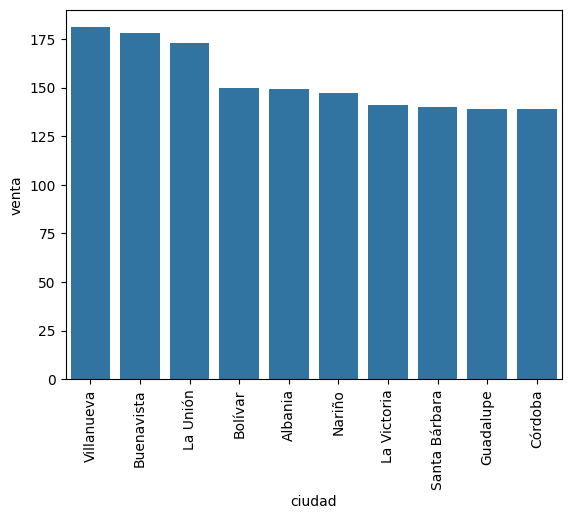

In [32]:
ventas_ciudad= ventas.groupby(["ciudad"])["venta"].sum()
ventas_ciudad.sort_values(ascending=False, inplace=True)
ventas_ciudad = ventas_ciudad[0:10].reset_index()
ax = sns.barplot(y="venta", x="ciudad", data=ventas_ciudad, order=ventas_ciudad.sort_values('venta', ascending=False)["ciudad"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

El gráfico de barras nos muestra las 10 ciudades que más compraron los productos de nuestro canal de televentas, siendo la ciudad de villanueva con el mayor número de compras por un valor superior a los 175 unidades de producto.

In [33]:
#producto más popular en cada ciudad

ventas_ciudad_item = ventas.groupby(["ciudad","id_producto"])["venta"].sum().reset_index()

for ciudad in ventas_ciudad_item.ciudad.unique():
    agg_ventas_ciudad = ventas_ciudad_item.loc[ventas_ciudad_item["ciudad"] == ciudad]
    item_ciudad_sort = agg_ventas_ciudad.sort_values(["venta"], ascending=False)
    print(item_ciudad_sort.max())

ciudad         Abejorral
id_producto           89
venta                  3
dtype: object
ciudad         Abriaquí
id_producto          88
venta                 4
dtype: object
ciudad         Acacías
id_producto         89
venta                3
dtype: object
ciudad         Acandí
id_producto        89
venta               2
dtype: object
ciudad         Acevedo
id_producto         89
venta                2
dtype: object
ciudad         Achí
id_producto      87
venta             3
dtype: object
ciudad         Agrado
id_producto        88
venta               4
dtype: object
ciudad         Agua de Dios
id_producto              89
venta                     2
dtype: object
ciudad         Aguachica
id_producto           87
venta                  5
dtype: object
ciudad         Aguada
id_producto        89
venta               3
dtype: object
ciudad         Aguadas
id_producto         89
venta                2
dtype: object
ciudad         Aguazul
id_producto         89
venta                3
dtype:

Se observa que el producto más popular por ciudad es el producto 89.

In [34]:
#conteo de la variable tiene_hijos
ventas['tiene_hijos'].value_counts()

1    50117
0    49883
Name: tiene_hijos, dtype: int64

los clientes en su mayoria tienen hijos, con un valor de 50117 clientes que lo afirman.

# Análisis de la base ventas con cruces 2x2

**Analizando las variables 'ciudad' y 'género' juntas.**

In [35]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['genero'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

genero,Femenino,Masculino,All
ciudad,,,
Abejorral,0.035,0.052,0.087
Abriaquí,0.047,0.041,0.088
Acacías,0.054,0.046,0.100
Acandí,0.050,0.035,0.085
Acevedo,0.042,0.038,0.080
...,...,...,...
Ábrego,0.051,0.050,0.101
Íquira,0.038,0.037,0.075
Úmbita,0.043,0.045,0.088


Hay un 3,5% de los clientes que son mujeres que son de la ciudad de Abejorral, así mismo, hay un 5,2% de los clientes que son hombres y son de la ciudad de Abejorral.

Hay un 4,6% de los clientes que son Femeninas que son de la ciudad de útica y un 4,1% de los clientes Masculinos que viven en la misma ciudad.

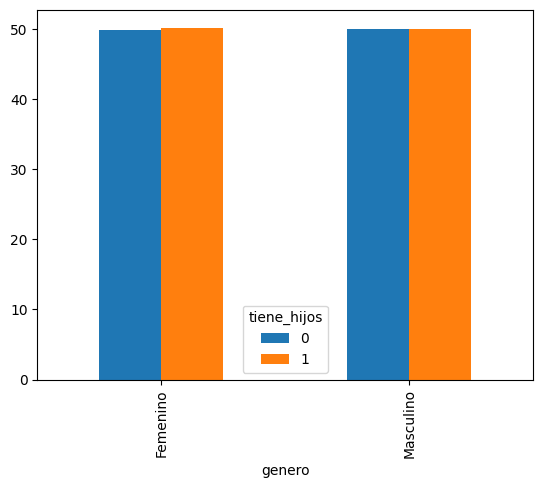

In [36]:
#Gráfico de barras de genero según si tiene o no hijos
plot= pd.crosstab(index=ventas['genero'], columns= ventas['tiene_hijos']).apply(lambda r :r/r.sum()*100, axis= 1).plot(kind ='bar')

Se puede ver en el gráfico de barras que para los clientes de género femenino son levemente más las que tienen hijos vs las que no tienen hijos y para los clientes de género masculino, es similar la cantidad de clientes que tienen hijos a los que no tienen hijos.


**Análisis de las variables 'ciudad' y 'venta' juntas.**

In [37]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['ciudad'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
ciudad,,,
Abejorral,0.043,0.044,0.087
Abriaquí,0.039,0.049,0.088
Acacías,0.044,0.056,0.100
Acandí,0.042,0.043,0.085
Acevedo,0.034,0.046,0.080
...,...,...,...
Ábrego,0.043,0.058,0.101
Íquira,0.045,0.030,0.075
Úmbita,0.044,0.044,0.088


Hay un 4,3% de los clientes que viven en la ciudad de Aberjorral que no realizaron alguna compra, mientras que en la ciudad de Abriaquí el 4,9% de los clientes realizaron alguna compra.

**Análisis de las variables 'género' y 'venta' juntas.**

In [38]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['genero'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
genero,,,
Femenino,24.714,25.097,49.811
Masculino,25.157,25.032,50.189
All,49.871,50.129,100.000


El género masculino realizó el 25,15% de las no ventas de productos, superando el resto de los ítems de la tabla.

**Análisis de las variables 'tiene_hijos' y 'venta' juntas.**

In [39]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['tiene_hijos'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
tiene_hijos,,,
0,24.904,24.979,49.883
1,24.967,25.150,50.117
All,49.871,50.129,100.000


El 25,15% de los clientes que realizó una compra tiene hijos.

**Análisis de las variables 'edad' y ' venta' juntas.**

In [40]:
#tabla de contingencia en porcentajes relativos total para las variables de la base de datos de ventas
pd.crosstab(index=ventas['edad'], columns= ventas['venta'],margins =True).apply(lambda r :r/len(ventas)*100, axis= 1)

venta,0,1,All
edad,,,
18,0.431,0.468,0.899
19,0.793,0.792,1.585
20,0.758,0.762,1.520
21,0.822,0.825,1.647
22,0.811,0.772,1.583
...,...,...,...
79,0.786,0.764,1.550
80,0.791,0.806,1.597
81,0.365,0.360,0.725


**Análisis de correlación de las variables de la base 'ventas'**

<ipython-input-41-bad129a1e3dc>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

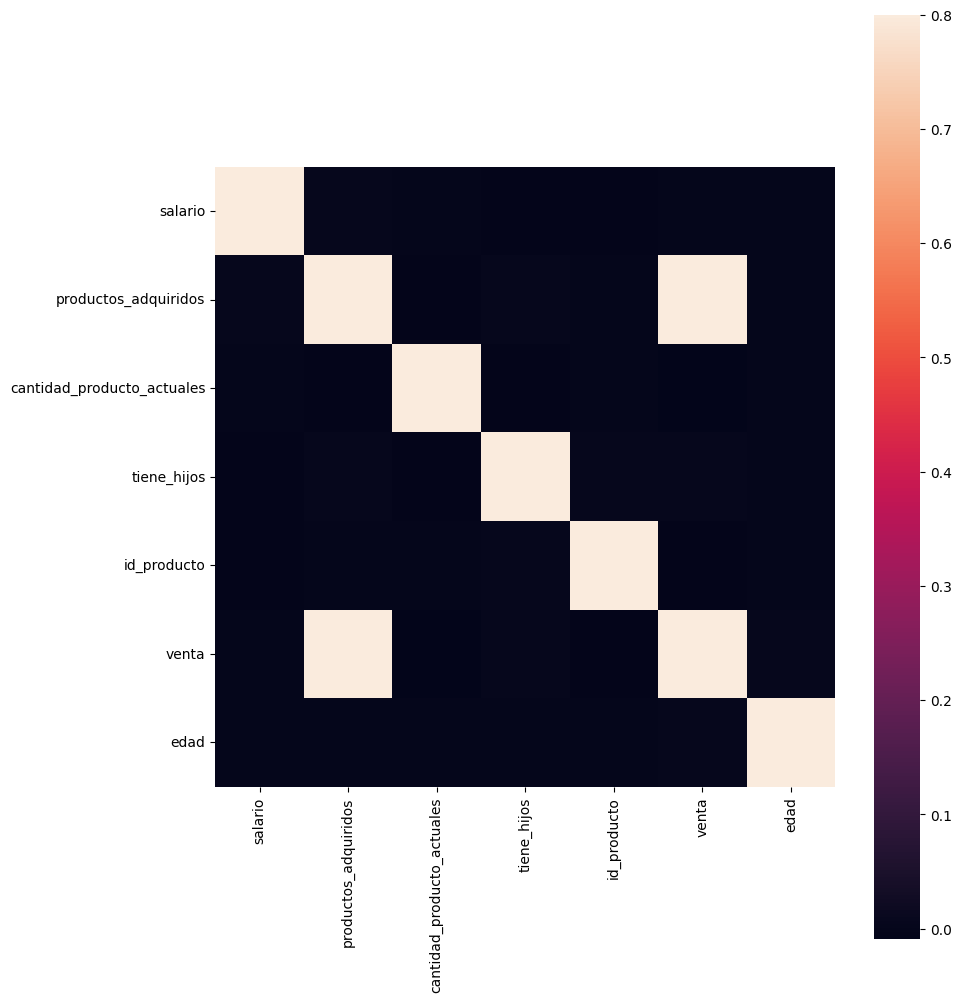

In [41]:
#Miraremos el comportamiento del dataframe con respecto a todas las variables

corrmat= ventas.corr()
f, ax= plt.subplots(figsize=(10, 12))
sns.heatmap(corrmat, vmax=0.8, square=True)


El mapa de calor de correlación nos indica que únicamente hay correlación lineal entre la variable venta y la variable productos_adquiridos.
Es decir, que para el resto de las variables hay otros factores que afecten la relación entre esas variables y la venta.


En resumen, La ciudad de mayor número de clientes es la ciudad de Villanueva, aunque en nuestra muestra hay mayor número de clientes de género Masculino, los clientes femeninas compran más, adicional,  compran más los clientes que tienen hijos.
El producto que más adquirido por ciudad es el producto 89, sin embargo, el producto con 'id_producto = 79' es el producto que más aparece en nuestra base de datos 'ventas'pero no quiere decir que se haya efectuado una venta positiva o negativa.

Miraremos mas a fondo la variable 'id_producto'.
Para ello, miraremos un conteo de los 10 productos que más aparecen en nuestra base de datos 'ventas',y analizaremos si se realizan ventas positivas, además realizaremos un cruce con la base de datos 'df_productos' para establecer estadísticas clave de los productos.
La base de datos 'df_productos' es una base de datos con información asociada a los productos vigentes en el canal de televentas,las variables que contiene esta base de datos son:
Producto_id : Es el indicador del producto en el canal de televentas.
nombre : es el nombre asociado al producto_id que tiene en el canal de televentas.
tipo : clasificación en 3 niveles de calidad del producto.
uso : clasificación de 2 niveles del ambiente recomendado para el uso del producto.
valor : el valor monetario del producto por unidad adquirida.

**Análisis de la variable 'id_producto'**

In [42]:
#Conteo de los 10 primeros productos
ventas['id_producto'].value_counts().head(10)

78    1221
15    1218
71    1206
81    1200
11    1200
36    1194
68    1193
17    1189
8     1184
72    1183
Name: id_producto, dtype: int64

Vamos a unir la base de datos de ventas con la base de datos de producto.Recordemos que la base de datos de ventas comprende información sobre clientes que ya han sido gestionados en otros ciclos campañales y que la base de datos de producto relaciona detalles sobre los diferentes productos disponibles para el consumo de los clientes.


# Análisis exploratorio para la base de datos 'productos'.

In [43]:
#Cargando la base de datos de productos

producto= pd.read_csv("/content/df_productos.csv", delimiter=";" , encoding='latin-1')
print(producto.head(10))

   producto_id      nombre     tipo      uso nacionalidad     valor
0            1  Producto A   Básico    Hogar    Importado  12410,41
1            2  Producto B  Premium  Oficina     Nacional  59598,42
2            3  Producto C    Nuevo    Hogar    Importado  46529,85
3            4  Producto D   Básico    Hogar    Importado  36847,89
4            5  Producto E  Premium    Hogar     Nacional   5778,32
5            6  Producto F  Premium  Oficina    Importado    5892,0
6            7  Producto G    Nuevo    Hogar     Nacional  50385,45
7            8  Producto H  Premium  Oficina     Nacional   50637,8
8            9  Producto I   Básico  Oficina    Importado  85144,12
9           10  Producto J  Premium  Oficina     Nacional  11597,45


In [44]:
#visualizar el tamaño del dataset
producto.shape

(100, 6)

In [45]:
producto.dtypes

producto_id      int64
nombre          object
tipo            object
uso             object
nacionalidad    object
valor           object
dtype: object

In [46]:
#modificando la variable 'valor'para obtener un número entero.
producto['valor']= producto['valor'].str.replace(r"\W","")
print(producto)


    producto_id      nombre     tipo      uso nacionalidad    valor
0             1  Producto A   Básico    Hogar    Importado  1241041
1             2  Producto B  Premium  Oficina     Nacional  5959842
2             3  Producto C    Nuevo    Hogar    Importado  4652985
3             4  Producto D   Básico    Hogar    Importado  3684789
4             5  Producto E  Premium    Hogar     Nacional   577832
..          ...         ...      ...      ...          ...      ...
95           96  Producto R   Básico    Hogar     Nacional   554798
96           97  Producto S  Premium    Hogar     Nacional   671161
97           98  Producto T    Nuevo    Hogar    Importado  6880702
98           99  Producto U    Nuevo    Hogar     Nacional  2014314
99          100  Producto V  Premium    Hogar     Nacional  5603839

[100 rows x 6 columns]


<ipython-input-46-3c5c1a0a64b6>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [47]:

#modificando la variable 'valor' de object a int
producto['valor']= pd.to_numeric(producto['valor'].astype(int))
producto.dtypes

producto_id      int64
nombre          object
tipo            object
uso             object
nacionalidad    object
valor            int64
dtype: object

In [48]:
#Conteo de la variable nombre
producto['nombre'].value_counts().sample(10)


Producto N    4
Producto D    4
Producto V    4
Producto X    3
Producto P    4
Producto T    4
Producto G    4
Producto U    4
Producto A    4
Producto O    4
Name: nombre, dtype: int64

In [49]:
#Conteo para la variable nacionalidad
producto['nacionalidad'].value_counts()

Nacional     53
Importado    47
Name: nacionalidad, dtype: int64

**Análisis de la base de datos 'df_productos' con cruces 2x2 entre sus variables.**

In [50]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
nombre,,,
Producto A,2.0,2.0,4.0
Producto B,2.0,2.0,4.0
Producto C,1.0,3.0,4.0
Producto D,2.0,2.0,4.0
Producto E,1.0,3.0,4.0
Producto F,3.0,1.0,4.0
Producto G,2.0,2.0,4.0
Producto H,0.0,4.0,4.0
Producto I,2.0,2.0,4.0


Se puede ver que los productos nacionales predominan los nombres de PRODUCTOC, PRODUCTOE, PRODUCTOH ,PRODUCTOQ ,PRODUCTOU ,PRODUCTOV y en productos importados predominan los nombres de PRODUCTOZ, PRODUCTOT, PRODUCTOP, PRODUCTOO, PRODUCTON y PRODUCTOF.

In [51]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['uso'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
uso,,,
Hogar,24.0,31.0,55.0
Oficina,23.0,22.0,45.0
All,47.0,53.0,100.0


Hay un 24% de productos que son de nacionalidad importados y de uso para el hogar, hay un 23% de productos que son de nacionalidad importados y de uso para la oficna. Asi mismo,hay un 31% de productos que son de nacionalidad nacional y de uso para el hogar, y hay un 22% de productos de nacionalidad 'nacional' y de uso para la oficina.

In [52]:
#Conteo para la variable uso
producto['uso'].value_counts().head()

Hogar      55
Oficina    45
Name: uso, dtype: int64

In [53]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['uso'], columns= producto['tipo'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

tipo,Básico,Nuevo,Premium,All
uso,,,,
Hogar,16.0,18.0,21.0,55.0
Oficina,16.0,12.0,17.0,45.0
All,32.0,30.0,38.0,100.0


Hay un 16% de productos que son de tipo 'básico' que son de uso para el hogar y para la oficina.
Hay un 18% de productos de tipo 'nuevo' que son en su mayoría de uso de hogar y hay un 17% de productos que son de tipo 'premium' que son en su mayoría de uso para la oficina.

In [54]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['uso'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

uso,Hogar,Oficina,All
nombre,,,
Producto A,3.0,1.0,4.0
Producto B,2.0,2.0,4.0
Producto C,3.0,1.0,4.0
Producto D,3.0,1.0,4.0
Producto E,3.0,1.0,4.0
Producto F,2.0,2.0,4.0
Producto G,3.0,1.0,4.0
Producto H,2.0,2.0,4.0
Producto I,1.0,3.0,4.0


Los productos que predominan para el Hogar son los nombres de productos PRODUCTOR, PRODUCTOA, PRODUCTOC, PRODUCTOD, PRODUCTOE,PRODUCTOG,PRODUCTOK,PRODUCTOT,PRODUCTOU.
El producto que predomina para la oficina es el nombre de producto PRODUCTOP.

In [55]:
#Conteo para la variable tipo
producto['tipo'].value_counts().head()

Premium    38
Básico     32
Nuevo      30
Name: tipo, dtype: int64

In [56]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['nombre'], columns= producto['tipo'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

tipo,Básico,Nuevo,Premium,All
nombre,,,,
Producto A,2.0,1.0,1.0,4.0
Producto B,0.0,1.0,3.0,4.0
Producto C,1.0,2.0,1.0,4.0
Producto D,2.0,1.0,1.0,4.0
Producto E,3.0,0.0,1.0,4.0
Producto F,1.0,1.0,2.0,4.0
Producto G,2.0,2.0,0.0,4.0
Producto H,0.0,1.0,3.0,4.0
Producto I,2.0,0.0,2.0,4.0


El producto que es de tipo más básico es el producto PRODUCTOE, el producto que predomina de tipo nuevo es el producto PRODUCTOV, y los productos que son de tipo premium son los productos PRODUCTOB, PRODUCTOH, PRODUCTOL.

In [57]:
#tabla de contingencia en porcentajes relativos total
pd.crosstab(index=producto['tipo'], columns= producto['nacionalidad'],margins =True).apply(lambda r :r/len(producto)*100, axis= 1)

nacionalidad,Importado,Nacional,All
tipo,,,
Básico,21.0,11.0,32.0
Nuevo,10.0,20.0,30.0
Premium,16.0,22.0,38.0
All,47.0,53.0,100.0


Hay un 21% de los productos de tipo básico con son de nacionalida importados,los productos de tipo 'nuevo' son de nacionalidad nacional en un 20% y los productos premium son de nacionalidad nacional en un 22%.

In [58]:
#Resumen de estadística descriptiva:
producto.describe()

,producto_id,valor
count,100.000000,1.000000e+02
mean,50.500000,4.555579e+06
std,29.011492,2.906434e+06
min,1.000000,5.892000e+04
25%,25.750000,2.175613e+06
50%,50.500000,4.619498e+06
75%,75.250000,6.681008e+06
max,100.000000,9.800829e+06


Analicemos el 'id_producto' por cada una de las variables de la base de datos de 'producto'


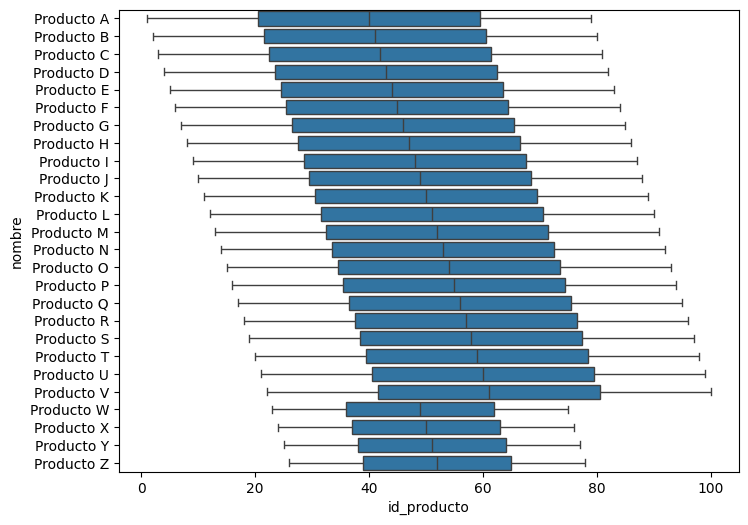

In [59]:
#Renombrando la variable 'producto_id' de la base de datos "df_producto" por su nuevo nombre : 'id_producto'.
producto.rename(columns= {'producto_id': 'id_producto'}, inplace=True)
#cruzando las bases de datos 'ventas' y 'df_productos' por la variable 'id_producto'
data = pd.concat([producto['nombre'], producto['id_producto']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="id_producto", y="nombre", data=producto)

Se puede observar que los productos que contienen menos cantidad de id_productos son los 'nombres' PRODUCTOW, PRODUCTOX, PRODUCTOY y PRODUCTOZ, que contienen 3 valores de id_producto cada uno.

In [60]:
#Uniendo las bases de datos 'ventas' y 'producto' por medio de la variable 'id_producto'

df= pd.merge(ventas, producto, on='id_producto', how='inner')
print(df.head(10))



     salario            ciudad     genero fecha_nacimiento  \
0  8340888.0  Puerto Leguízamo  Masculino       1980-05-24   
1  4178426.0         Chigorodó   Femenino       1997-11-09   
2  8017449.0            La Paz   Femenino       1950-04-28   
3  5639694.0          Curumaní  Masculino       1963-08-13   
4  8029608.0     Puerto Berrío  Masculino       1943-10-10   
5  2448847.0            Timbío   Femenino       1942-08-26   
6  7591127.0             Sucre   Femenino       1952-11-11   
7  9968410.0         Río Quito   Femenino       1968-09-30   
8  9580412.0          Norcasia   Femenino       1966-04-24   
9  3167679.0             Chima   Femenino       2003-05-25   

   productos_adquiridos  cantidad_producto_actuales  tiene_hijos  id_producto  \
0                     0                           2            1           17   
1                     3                           1            1           17   
2                     0                           2            1          

In [61]:
#verificando el tamaño de la base de datos

df.shape

(100000, 15)

Miremos las ganancias de los productos

In [62]:
ganancias= round((df['productos_adquiridos']* df['valor']).sum(),2)
print(f"Ganancias totales de ventas : {ganancias}")


Ganancias totales de ventas : 1276725503672


In [63]:
#Ganancias por producto por año
df['year']= df['fecha_nacimiento'].dt.year
df.head(3)

,salario,ciudad,genero,fecha_nacimiento,productos_adquiridos,cantidad_producto_actuales,tiene_hijos,id_producto,venta,edad,nombre,tipo,uso,nacionalidad,valor,year
0,8340888.0,Puerto Leguízamo,Masculino,1980-05-24,0,2,1,17,0,43,Producto Q,Premium,Oficina,Nacional,2476561,1980
1,4178426.0,Chigorodó,Femenino,1997-11-09,3,1,1,17,1,26,Producto Q,Premium,Oficina,Nacional,2476561,1997
2,8017449.0,La Paz,Femenino,1950-04-28,0,2,1,17,0,73,Producto Q,Premium,Oficina,Nacional,2476561,1950


In [64]:
#Ganancias por año
df['Revenue']= df['id_producto']* df['valor']
ganancias_year = df[['Revenue','year']].groupby('year').sum().reset_index()
ganancias_year= ganancias_year.sort_values('Revenue', ascending= False)

df_ganancias= pd.DataFrame(ganancias_year)
df_ganancias


,year,Revenue
49,1991,349058998753
60,2002,348529785025
45,1987,347423482199
36,1978,345237925663
29,1971,344904001881
...,...,...
42,1984,311357420594
10,1952,310923778514
21,1963,305304155074
63,2005,207806839363


In [65]:
print(np.min(df_ganancias))
print(np.max(df_ganancias))

year               1942
Revenue    130119415465
dtype: int64
year               2005
Revenue    349058998753
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'



In [66]:
df_ganancias.index = df_ganancias['year']
df_ganancias = df_ganancias.drop('year', axis= 'columns')


In [67]:
x= df_ganancias.index
y= df_ganancias['Revenue']
y

year
1991    349058998753
2002    348529785025
1987    347423482199
1978    345237925663
1971    344904001881
            ...     
1984    311357420594
1952    310923778514
1963    305304155074
2005    207806839363
1942    130119415465
Name: Revenue, Length: 64, dtype: int64

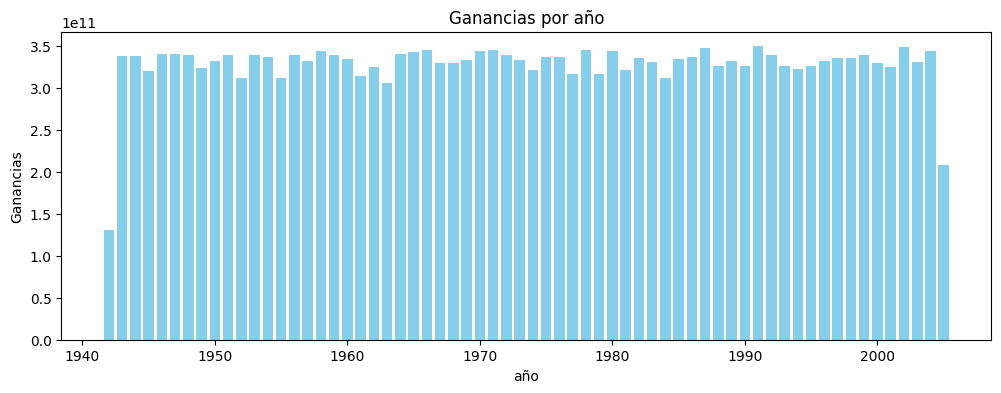

In [68]:
#Gráfico de barras de ganancia por año
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x,y, color='skyblue', label= 'Ganancias')
ax.set_xlabel('año')
ax.set_ylabel('Ganancias')
ax.set_title('Ganancias por año')
plt.show()

El año con menores ventas fue 1941 con un total de $130.116.2338.
Se evidencia que las ganancias se han mantenido estables con el tiempo, manteniéndose después de los años 90's las ganancias relativamente continuas y después del años 2000, hubo un pico de incremento de las televentas.

In [69]:
#Ganancias de ventas por ciudad
ganancias_ciudad =df[['Revenue','ciudad']].groupby('ciudad').sum().reset_index()
ganancias_ciudad= ganancias_ciudad.sort_values('Revenue', ascending= False)

ganancias_ciudad

,ciudad,Revenue
1001,Villanueva,81318345274
455,La Unión,73191027227
108,Buenavista,71609409193
817,Santa Bárbara,66799159967
359,Guadalupe,58528575721
...,...,...
478,Luruaco,12293813388
321,Francisco Pizarro,12083777637
418,Junín,11920019784
958,Támara,11469641122


La ciudad con mayor número de ventas de productos es la ciudad de Villanueva

In [72]:
#producto que vendió más
producto_venta= df[['productos_adquiridos','id_producto']].groupby('id_producto').sum().reset_index()
producto_venta = producto_venta.sort_values('productos_adquiridos', ascending= False)
producto_venta

,id_producto,productos_adquiridos
18,20,3480
65,67,3467
66,68,3453
13,15,3448
45,47,3374
...,...,...
2,4,2865
7,9,2843
74,76,2840
82,84,2795


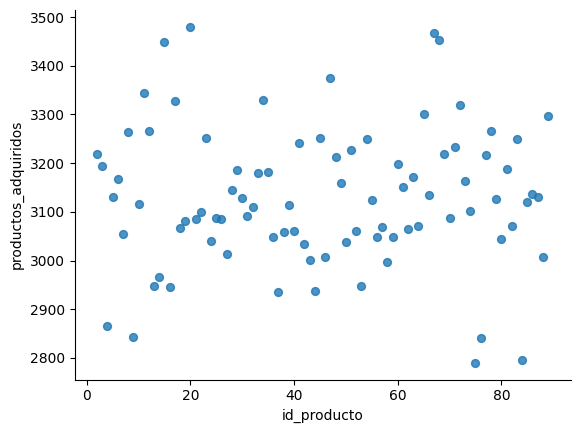

In [73]:
from matplotlib import pyplot as plt
producto_venta.plot(kind='scatter', x='id_producto', y='productos_adquiridos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [74]:
#tabla de contingencia en porcentajes relativos total
cruce= pd.crosstab(index= df['id_producto'], columns= df['productos_adquiridos'] ,margins =True).apply(lambda r :r/len(df)*100, axis= 1)
cruce

productos_adquiridos,0,1,2,3,4,5,6,7,8,9,10,All
id_producto,,,,,,,,,,,,
2,0.557,0.059,0.061,0.063,0.047,0.043,0.063,0.063,0.055,0.063,0.062,1.136
3,0.525,0.061,0.052,0.065,0.060,0.041,0.056,0.066,0.059,0.060,0.058,1.103
4,0.552,0.052,0.059,0.056,0.056,0.045,0.052,0.052,0.054,0.050,0.052,1.080
5,0.591,0.069,0.062,0.058,0.068,0.059,0.049,0.049,0.068,0.054,0.053,1.180
6,0.565,0.066,0.066,0.057,0.060,0.065,0.057,0.067,0.056,0.055,0.048,1.162
...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.541,0.045,0.059,0.063,0.061,0.065,0.052,0.046,0.050,0.059,0.065,1.106
87,0.556,0.060,0.059,0.075,0.060,0.064,0.049,0.061,0.053,0.047,0.060,1.144
88,0.560,0.060,0.059,0.060,0.046,0.048,0.061,0.051,0.060,0.047,0.060,1.112


In [75]:
cruce.max()

productos_adquiridos
0       49.871
1        5.040
2        5.027
3        5.046
4        4.881
5        5.105
6        4.996
7        5.075
8        5.048
9        4.872
10       5.039
All    100.000
dtype: float64

Hay un porcentaje mayor de que ningun producto fue adquirido por algún cliente.

Como se había visto en el anális anterior de la tabla de ventas, el producto que vendió más por ciudad fue el 89. Repite el producto 89 como el más adquirido por los clientes en una cantidad de 7 unidades.
El nombre del producto es PRODUCTOK y es un producto tipo premium, con uso de hogar y es producto nacional.

Ahora vamos a tener presente el 'id_producto = 89' como objetivo de evaluación. Para ello mediremos los comentarios del producto a través de la base de datos 'encuentas' para tener una idea más amplia de la satisfacción del cliente por el producto.
La base de datos encuestas contiene las siguientes variables:
Id_producto : valor indicativo del producto en el canal de televentas.
ciudad : Ciudad de la cual está respondiendo la encuesta.
calificación : Escala de medida del 1 al 10 donde 1 es muy malo y 10 es excelente.
comentarios : algún comentario que el cliente desee dejar sobre su grado de satisfacción sobre el producto adquirido.


# Análisis exploratorio para la satisfacción de producto.

In [76]:
#cargando base de datos encuestas

encuentas= pd.read_csv('/content/encuestas.csv', delimiter=";", encoding='latin-1')
print(encuentas.head(10))

   id_producto        ciudad  calificacion  \
0           52   Pensilvania            10   
1           83      Filandia             1   
2           15      Buriticá            10   
3           54     Arboledas             1   
4            4  Ventaquemada             2   
5           17        Suesca             7   
6           43     Tierralta             8   
7            3        Rivera             1   
8           28   Providencia             4   
9           51        Caloto             8   

                                comentarios  
0                          No lo recomiendo  
1               No cumplió mis expectativas  
2              No está en el tamaño deseado  
3              No está en el tamaño deseado  
4                  Me encanta este producto  
5                  Me encanta este producto  
6                            Es muy costoso  
7  Tiene una buena relación costo beneficio  
8                  Me encanta este producto  
9                   Buena calidad

In [77]:
encuentas.dtypes

id_producto      int64
ciudad          object
calificacion     int64
comentarios     object
dtype: object

**Análisis de variables 2x2 de la base de datos 'encuesta'.**

In [78]:
#Haremos cruce de variables para entender un poco la base de datos encuentas
pd.crosstab(index= encuentas['id_producto'], columns= encuentas['ciudad'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)

ciudad,Abriaquí,Acandí,Acevedo,Agua de Dios,Aguada,Aguadas,Aguazul,Agustín Codazzi,Aipe,Albania,...,Zambrano,Zapatoca,Zarzal,Zetaquira,Zipacón,Ábrego,Íquira,Úmbita,Útica,All
id_producto,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.2


In [79]:
pd.crosstab(index= encuentas['id_producto'], columns= encuentas['calificacion'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)

calificacion,1,2,3,4,5,6,7,8,9,10,All
id_producto,,,,,,,,,,,
2,0.1,0.2,0.1,0.0,0.1,0.1,0.0,0.0,0.4,0.0,1.0
3,0.2,0.2,0.0,0.1,0.1,0.1,0.2,0.1,0.1,0.1,1.2
4,0.3,0.4,0.0,0.0,0.1,0.1,0.2,0.2,0.1,0.0,1.4
5,0.2,0.0,0.0,0.0,0.2,0.3,0.0,0.3,0.2,0.0,1.2
6,0.0,0.3,0.1,0.0,0.2,0.1,0.1,0.3,0.3,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...
86,0.1,0.2,0.3,0.3,0.3,0.1,0.2,0.1,0.1,0.2,1.9
87,0.2,0.1,0.2,0.0,0.1,0.0,0.0,0.2,0.0,0.1,0.9
88,0.2,0.1,0.1,0.1,0.1,0.2,0.0,0.0,0.0,0.4,1.2


El producto 89 obtuvo una calificación de 1 en condición de insastisfacción por el cliente en un 30% de las encuentas

In [80]:
cc=pd.crosstab(index= encuentas['ciudad'], columns= encuentas['calificacion'] ,margins =True).apply(lambda r :r/len(encuentas)*100, axis= 1)
cc

calificacion,1,2,3,4,5,6,7,8,9,10,All
ciudad,,,,,,,,,,,
Abriaquí,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1
Acandí,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1
Acevedo,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.2
Agua de Dios,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
Aguada,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...
Ábrego,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1
Íquira,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
Úmbita,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1


In [81]:
#variable 'ciudad'
duplicados= encuentas['ciudad'].duplicated()

if duplicados.any():
  print(f"Hay valores duplicados.")
else:
  print(f"No hay valores duplicados")

#variable 'id_producto'
duplicados1= encuentas['id_producto'].duplicated()

if duplicados1.any():
  print(f"Hay duplicados.")
else:
  print(f"No hay duplicados")


Hay valores duplicados.
Hay duplicados.


In [82]:
#Eliminando duplicados en la variable 'ciudad' y la variable 'id_producto'
sin_duplicados= encuentas.drop_duplicates(subset=['ciudad'])

sin_duplicados1= encuentas.drop_duplicates(subset=['id_producto'])


In [83]:
nueva_encuestas= encuentas[encuentas['ciudad'].isin(sin_duplicados['ciudad'])]

In [84]:
nuevo_df= nueva_encuestas[nueva_encuestas['id_producto'].isin(sin_duplicados1['id_producto'])]
print(nuevo_df.sample(10))

     id_producto                   ciudad  calificacion  \
415            6               Candelaria             3   
67            43                  Venecia             2   
768           59                 Cumaribo             3   
930           75                     Pulí            10   
572           11               Campamento             7   
124           59                     Chía             7   
947           11              Santa Marta             9   
208           31               Entrerríos             5   
390           53                  Ituango            10   
720           87  San Andrés de Sotavento             1   

                                  comentarios  
415                   Buena calidad pero caro  
67                             Es muy costoso  
768                   Buena calidad pero caro  
930                            Es muy costoso  
572  Tiene una buena relación costo beneficio  
124  Tiene una buena relación costo beneficio  
947           

In [85]:
nuevo_df.shape

(1000, 4)

In [86]:
#integrando la base de datos encuentas a la base de datos de base de ventas y base de producto
df2= pd.merge(df, nuevo_df, on=['id_producto', 'ciudad'], how='inner')
print(df2.sample(10))

        salario           ciudad     genero fecha_nacimiento  \
912   4150013.0    Fuente de Oro  Masculino       1974-04-11   
355   9060729.0           Toledo  Masculino       1983-06-26   
1139  4543830.0  San José de Uré   Femenino       1952-09-03   
277   6752390.0        Santacruz  Masculino       1949-10-19   
971   4855250.0          Morales  Masculino       1983-09-19   
774   6933011.0          Granada   Femenino       1986-02-18   
688   8939409.0          Guatapé  Masculino       1959-08-11   
276   2828967.0            Imués   Femenino       1972-01-13   
403   8917914.0          Palmira  Masculino       2001-08-28   
909   8258214.0             Tame   Femenino       1956-06-22   

      productos_adquiridos  cantidad_producto_actuales  tiene_hijos  \
912                      0                           4            1   
355                      3                           1            1   
1139                     2                           1            0   
277        

In [87]:
df2.shape

(1175, 19)

In [90]:
df.shape

(100000, 17)

# Selección de variables y reducción de dimensionalidad.


In [105]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression


In [106]:
#separando las características de las variables
#variable objetivo : 'venta'
new_datax= df2.drop(['salario','ciudad','genero','fecha_nacimiento','productos_adquiridos','cantidad_producto_actuales','tiene_hijos','nombre', 'tipo', 'nacionalidad','uso','valor','calificacion','comentarios'], axis=1)
new_datay= df2['venta']

In [107]:
#Escalar las características para que tengan media 0 y desviación estándar 1.
scaler = StandardScaler()
x_scaler = scaler.fit_transform(new_datax)


In [113]:
#Realizar selección de caracterísrticas utilizando SelectKBest
selector = SelectKBest(score_func= f_regression, k=3)#selecciona las 5 mejores características
x_select = selector.fit_transform(x_scaler, new_datay)

In [114]:
#Aplicar reducción de dimensionalidad usando PCA
pca = PCA(n_components= 2)#reducir a 2 componentes principales
x_pca = pca.fit_transform(x_select)


In [119]:
#crear un nuevo dataframe con las características seleccionadas
df_new = pd.DataFrame(x_pca, columns= ['componente1', 'componente2'])
df_new['producto'] = df2['id_producto']
print(df_new.head(10))

   componente1  componente2  producto
0     2.102992    -1.066565        17
1    -2.227534    -0.710795        17
2    -1.252178    -0.790914        17
3     1.868910    -1.047334        17
4    -1.408232    -0.778093        17
5    -2.344558    -0.701167        17
6     1.868910    -1.047334        17
7    -2.344558    -0.701167        17
8     0.854557    -0.963997        17
9    -0.393878    -0.861429        17


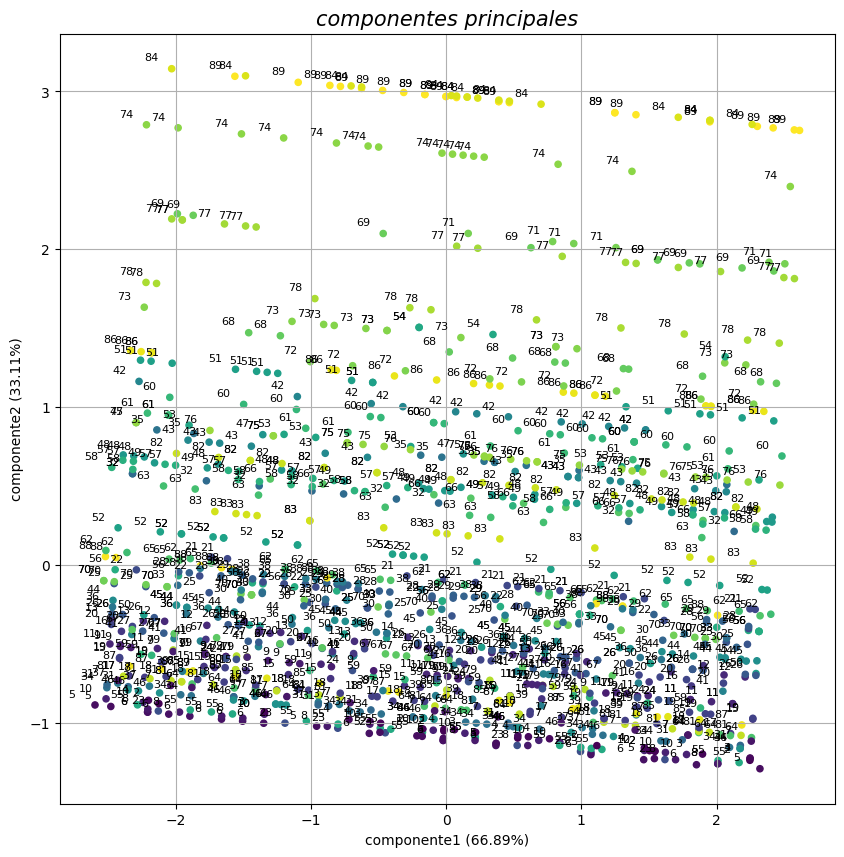

In [122]:
#Gráfico de dispersión
import matplotlib.pyplot as plt

plt.figure(figsize= (10,10))
plt.title('Gráfico de dispersión de componente1 vs componente2')
x_label = 'componente1 (' + str(round(pca.explained_variance_ratio_[0]*100,2)) + '%)'
y_label = 'componente2 (' + str(round(pca.explained_variance_ratio_[1]*100,2)) + '%)'

nombres = df2['id_producto']
ax = plt.subplot(1,1,1)
ax.set_xlabel(x_label, fontsize =10)
ax.set_ylabel(y_label, fontsize =10)
ax.set_title('componentes principales', fontsize =15, fontstyle = 'italic')
ax.scatter( x = df_new['componente1'],y = df_new['componente2'], c= df_new['producto'], s = 20)

for i, nombre in enumerate(nombres):
  ax.annotate(nombre, (df_new['componente1'][i]-0.2, df_new['componente2'][i]+0.05),fontsize=8)

plt.grid(True)
plt.show()